## Accessing The data provider VIA Python

This tutorial introduces how to use Python to connect to the AURIN Data Provider (ADP) and download data. This is designed with no prerequisite of Python experience.

The ADP is an interface that allows you to use programming scripts to interact with and access the AURIN Data Catalogue. You can send a request to the ADP using Python scripts and get a response to download specific datasets. The ADP is based on [Open Geospatial Consortium](https://en.wikipedia.org/wiki/Open_Geospatial_Consortium) Web Feature Service (WFS) Interface Standards.

**Before commencing this step, please ensure you have generated your unique ADP Credentials (username and password) using the [ADP Access Dashboard](https://adp-access.aurin.org.au/login).**

## Tutorial goals:

In this tutorial, our goal is to use a Python script to connect to the ADP and download a dataset. You will learn how to:

1. Choose between different Python environments
2. Install related Python packages
3. Use Python coding environments
4. Interact with the ADP
    1. Setup connection parameters
    2. Use WFS service to connect to the ADP
    3. Download data
    4. View data
    5. Visualise data
    6. Download data in other formats



## 1. Choose between Different Python Environments

[Python](http://python.org) is a free and open-source high-level, interpreted, general-purpose programming language. It is widely used in data science and has become a very powerful tool for data analysts from all disciplines, from economics to ecology and geography. The [geographic information system](https://en.wikipedia.org/wiki/Geographic_information_system) (GIS) capabilities of Python have developed significantly over the last decade.

If you are getting started with Python, we suggest you use a cloud environment, such as Google Colab, as it has Python and its prerequisites already installed. If you wish to use your personal computer, we recommend using Python version 3.7.0 or later. We hope the image below may help you understand the benefits and limitations of each option.



<img src="https://user-images.githubusercontent.com/106126121/177277621-127ddec6-6773-4f1d-9c0f-345ce2059f74.png" width="650">

[Click here to learn how to set up the environment](https://aurin.org.au/resources/training/explore-python/) 



## 2. Python packages and Libraries

Python packages are libraries of Python functions developed by the Python community. We can import these packages to our Python script to add functionality. For this tutorial, we need to use the following Python packages:

-OWSLib (version 0.25.0)

-Fiona (version 1.8.21)

-GeoPandas (version 0.10.2)

-folium (version 0.12.1)

-requests (version 2.28.0)

[OWSLib](https://geopython.github.io/OWSLib/usage.html) is a Python package that we use to connect to the ADP.

[Fiona](https://pypi.org/project/Fiona/) and [GeoPandas](https://geopandas.org/en/stable/) are libraries to make working with geospatial data.

[Folium](https://python-visualization.github.io/folium/) makes it easy to visualise data.

[Requests](https://requests.readthedocs.io/en/latest/) is a simple, yet elegant, HTTP library.

## 3. Use Python coding environments

Now is the time to introduce how to use the Python coding environment. We Use Google Colab as an example. Open a new notebook in Colab.

You can install all of the Python packages in section 2 using the following command. The `pip install <package>` command always looks for the latest version of the package and installs it. If we’d like to install a specific version, we can use `==`, then follow the version number, for example, `owslib==0.25.0`.



In [ ]:
pip install owslib==0.25.0 fiona==1.8.21 geopandas==0.10.2 requests==2.28.0 folium==0.12.1

## Add a Code cell

Step 1, you can copy and paste the install command above into the Code cell.

Step 2, execute the command by clicking the run button.

We recommend this short video to learn more about the Jupyter notebook environment: [Get started with Google Colaboratory (Coding TensorFlow)](https://www.youtube.com/watch?v=inN8seMm7UI) 





<img src="https://user-images.githubusercontent.com/106126121/177473791-e573a4b4-0251-470b-8f6d-2999fd0b50c1.png" width="725">

After the installation of Python packages, we can load these packages for coding later. To load these packages, we use command `import`. `WebFeatureService` is the function we use in OWSLib.

Load the packages and additional functions:

In [ ]:
from owslib.wfs import WebFeatureService
import geopandas
import folium
import io

<img src="https://user-images.githubusercontent.com/106126121/177473798-9d4c4f89-1c2c-4a34-9902-d73c530a8d5f.png" width="725">

**Add another line of code**

Click **+Code button**, and then a new code cell is added to the environment. You can then copy and paste the import command above and execute it.

<img src="https://user-images.githubusercontent.com/106126121/177473801-3f990d36-6cda-48cb-b129-452a69cbf345.png" width="725">

**Add a text cell**

Click +Text button, and then a text cell is added to the environment. In a text cell, you may like to add some textual explanation of the code. You need to use the Markdown format for text editing.

Please find out more in this [Markdown Guide](https://colab.research.google.com/notebooks/markdown_guide.ipynb). The left hand side is the textual input and the right hand side displays the final appearance in the notebook.

When you finish editing and move to the next cell, it will automatically jump out of the editing mode, and appear on the right-hand side.

## 4. Interact with the ADP


### a. Setup connection parameters


To connect to the ADP you need to let Python know the address of the ADP and your credentials.

Please replace yourName and yourPassword in the code block below with your ADP username and password. If you don’t have ADP credentials, please generate your credentials via [ADP Access Dashboard](https://adp-access.aurin.org.au/).

In [ ]:
WFS_USERNAME = 'yourName'
WFS_PASSWORD= 'yourPassword'
WFS_URL='https://adp.aurin.org.au/geoserver/wfs'

Create a new adp_client, using the below code to connect to the ADP, which is itself a Web Feature Service (WFS).

In [4]:
adp_client = WebFeatureService(url=WFS_URL,username=WFS_USERNAME, password=WFS_PASSWORD, version='2.0.0')

## b. List available datasets

We can view the WFS operations.

In [5]:
# (Optional) Check what operations are available
[operation.name for operation in adp_client.operations]

['GetCapabilities',
 'DescribeFeatureType',
 'GetFeature',
 'GetPropertyValue',
 'ListStoredQueries',
 'DescribeStoredQueries',
 'CreateStoredQuery',
 'DropStoredQuery',
 'LockFeature',
 'GetFeatureWithLock',
 'Transaction',
 'ImplementsBasicWFS',
 'ImplementsTransactionalWFS',
 'ImplementsLockingWFS',
 'KVPEncoding',
 'XMLEncoding',
 'SOAPEncoding',
 'ImplementsInheritance',
 'ImplementsRemoteResolve',
 'ImplementsResultPaging',
 'ImplementsStandardJoins',
 'ImplementsSpatialJoins',
 'ImplementsTemporalJoins',
 'ImplementsFeatureVersioning',
 'ManageStoredQueries',
 'PagingIsTransactionSafe',
 'QueryExpressions']

We can view information about the dataset name and title of the first 10 datasets:

In [6]:
contents = list(adp_client.contents)
contents[:10]

['datasource-NSW_Govt_DPE-UoM_AURIN_DB:nsw_srlup_additional_rural_2014',
 'datasource-AU_Govt_ABS-UoM_AURIN_DB_GeoLevel:aus_2016_aust',
 'datasource-AU_Govt_ABS-UoM_AURIN_DB_GeoLevel:gccsa_2011_aust',
 'datasource-AU_Govt_ABS-UoM_AURIN_DB_GeoLevel:gccsa_2016_aust',
 'datasource-AU_Govt_ABS-UoM_AURIN_DB_GeoLevel:mb_2016_aust',
 'datasource-AU_Govt_ABS-UoM_AURIN_DB_GeoLevel:mb_2011_act',
 'datasource-AU_Govt_ABS-UoM_AURIN_DB_GeoLevel:mb_2011_nsw',
 'datasource-AU_Govt_ABS-UoM_AURIN_DB_GeoLevel:mb_2011_nt',
 'datasource-AU_Govt_ABS-UoM_AURIN_DB_GeoLevel:mb_2011_ot',
 'datasource-AU_Govt_ABS-UoM_AURIN_DB_GeoLevel:mb_2011_qld']

### c. Download data

You can search the [AURIN Data Catalogue](https://data.aurin.org.au) to find datasets you would like to download.

For example, if you are interested in a dataset describing the locations of fire stations in Victoria, enter “fire station” and click search. Browse the results and select
[VIC DELWP – Vicmap Features of Interest – Country Fire Authority (CFA) Fire Stations (Points)](https://data.aurin.org.au/dataset/vic-govt-delwp-datavic-vmfeat-cfa-fire-station-na) and view its description, including its metadata table.

To download that dataset into Python, find and copy its ADP ID from the metadata table, in this case, it is `datasource-VIC_Govt_DELWP-VIC_Govt_DELWP:datavic_VMFEAT_CFA_FIRE_STATION`. Then create the following query, pasting the ADP ID into the type name variable. The `GetFeature()` operation returns a selection of features from the data source. Then we save it to the variable called `response`. 

In [7]:
response = adp_client.getfeature(typename='datasource-VIC_Govt_DELWP-VIC_Govt_DELWP:datavic_VMFEAT_CFA_FIRE_STATION')

Next, save the variable `response` to a file named `data_fire.gml`. This file is in [gml](https://en.wikipedia.org/wiki/Geography_Markup_Language) format. If you'd like to download the dataset, please store it in a safe and secure environment.


In [8]:
out = open('data_fire.gml', 'wb')
out.write(response.read())
out.close()

### d.  View data

After downloading the information, we can use the function `geopandas.read_file` to load the data in a DataFrame.



Use the `head()` function to see fire stations on a map as individual point locations:

Now you will see information about the fire stations in tabular format:

In [9]:
data_fire = geopandas.read_file('data_fire.gml')
data_fire.head()

,gml_id,PFI,FEATURE_ID,FEATURE_TYPE,FEATURE_SUBTYPE,NAME,NAME_LABEL,AUTH_ORG_CODE,AUTH_ORG_ID,AUTH_ORG_VERIFIED,VMADD_PFI,VICNAMES_ID,VICNAMES_STATUS_CODE,STATE,CREATE_DATE_PFI,CREATE_DATE_UFI,OBJECTID,PARENT_FEATURE_ID,PARENT_NAME,geometry
0,VMFEAT_CFA_FIRE_STATION.62926122,655590,655590,emergency facility,fire station,KARABEAL FIRE STATION,Karabeal Fire Station,106,917,2022-03-22T00:00:00Z,425361444.0,13118,10,VIC,2010-04-01T10:26:44Z,2022-03-25T11:28:46Z,1997676,NaN,None,POINT (142.23150 -37.58820)
1,VMFEAT_CFA_FIRE_STATION.62926123,655591,655591,emergency facility,fire station,KARNAK FIRE STATION,Karnak Fire Station,106,620,2022-03-22T00:00:00Z,54327520.0,-1909887,11,VIC,2010-04-01T10:26:44Z,2022-03-25T11:28:46Z,1997677,637910.0,None,POINT (141.47160 -36.82640)
2,VMFEAT_CFA_FIRE_STATION.62926124,655592,655592,emergency facility,fire station,KARRAMOMUS FIRE STATION,Karramomus Fire Station,106,136,2022-03-22T00:00:00Z,425481983.0,13160,10,VIC,2010-04-01T10:26:44Z,2022-03-25T11:28:46Z,1997678,NaN,None,POINT (145.49810 -36.53750)
3,VMFEAT_CFA_FIRE_STATION.62926125,655593,655593,emergency facility,fire station,KATAMATITE FIRE STATION,Katamatite Fire Station,106,137,2022-03-22T00:00:00Z,54237347.0,13174,10,VIC,2010-04-01T10:26:44Z,2022-03-25T11:28:46Z,1997679,NaN,None,POINT (145.68870 -36.07880)
4,VMFEAT_CFA_FIRE_STATION.62926126,655594,655594,emergency facility,fire station,KATANDRA FIRE STATION,Katandra Fire Station,106,138,2022-03-22T00:00:00Z,54113246.0,13181,10,VIC,2010-04-01T10:26:44Z,2022-03-25T11:28:46Z,1997680,NaN,None,POINT (145.55920 -36.22560)


### e.  Visualise data

#### Static map

You can now visualise the fire stations on a map as individual point locations by using the `plot()` command.






<AxesSubplot:>

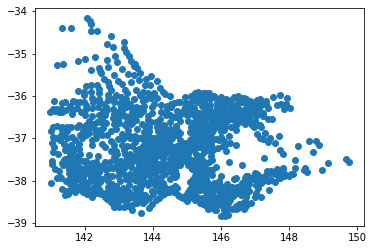

In [11]:
data_fire.plot()

#### Interactive map

Here we set up an interactive map to view the fire station dataset. The function folium.map creates an interactive map.

In [17]:
### ----- Define the basemap: Center: Australia ---- ### 
Map_aurin = folium.Map(location=[-23.43046024417681, 133.6034805654919],zoom_start=4,tiles='cartodbpositron')
### ----- Select Name and Geometry ---- ###
map_data = data_fire[['NAME','geometry']]### ----- Create a JSON with the information ------ ####
layer = map_data.to_json()
### --- Geojson -- ### 
folium.GeoJson(layer,name='geojson').add_to(Map_aurin)
### --- Show the map --- ###
Map_aurin

## f. Download data in other formats

The ADP support other data formats, such as GeoJSON, CSV, etc. For a full list of different formats and their syntax for coding, please check here. We choose the GeoJson format for demonstration.

GeoJSON format, download data and visualisation. `outputFormat='application/json'` helps to specify GeoJSON format.



In [13]:
response = adp_client.getfeature(typename='datasource-VIC_Govt_DELWP-VIC_Govt_DELWP:datavic_VMFEAT_CFA_FIRE_STATION', outputFormat='application/json')
out = open('data_fire.geojson', 'wb')
out.write(response.read())
out.close()
data_fire = geopandas.read_file('data_fire.geojson')

## g. Filter data by bounding box

The ADP supports spatial queries that permit filtering your data in a particular spatial area. For example, you can filter the data by bounding box (BBOX). By adding the BBOX, instead of downloading entire datasets, which can be very large and irrelevant to your project, you can download data according to your area of interest. Here we show an example to use the Melbourne CBD as the area of interest. The BBOX is a function from shapely.geometry.

The BBOX parameter allows you to search for features that are contained (or partially contained) inside a box of user-defined coordinates. The format of the BBOX parameter is `bbox=a1,b1,a2,b2,[crs]` where `a1`,`b1`,`a2` and `b2` represent the coordinate values. The `shapely.geometry.box()` function makes a rectangular polygon from the provided BBOX parameters.

We recommend using [BBox finder](http://bboxfinder.com/#-37.821684,144.951425,-37.806563,144.976358) to create your BBOX using a base map. Click the rectangle icon and draw a rectangle using your mouse to cover the Melbourne CBD area or any other areas you are interested in.

![Screen-Shot-2022-07-12-at-2 41 38-pm-1089x800](https://user-images.githubusercontent.com/106126121/178858710-14892508-aecf-4cfa-9078-bb5fbab94e96.png)

Now you can see the selected rectangle is covered in pink. You may check if it is the right area you’d like to collect data from. Copy the BBOX coordinates from the highlighted area, and replace the coordinates after the code `min_x,min_y,max_x,max_y -`. 

![Screen-Shot-2022-07-12-at-2 44 19-pm-1089x800](https://user-images.githubusercontent.com/106126121/178858739-a1749d5a-b51b-4a84-81ec-09a448a4538b.png)

You also need to replace yourName and yourPassword in the code block below with your ADP username and password. If you don’t have ADP credentials, please generate your credentials via the [ADP Access Dashboard](https://adp-access.aurin.org.au/).







In [1]:
###### ------ Libraries ------- ####
from owslib.wfs import WebFeatureService
import geopandas as gpd
from shapely.geometry import box
import io
import folium 

##### ----- Crendentials ------ #####
WFS_USERNAME = 'yourName' 
WFS_PASSWORD= 'yourPassword'
VERSION = '2.0.0'
WFS_URL='https://adp.aurin.org.au/geoserver/wfs'
adp_client = WebFeatureService(url=WFS_URL,
    username=WFS_USERNAME, 
    password=WFS_PASSWORD, 
    version=VERSION)

#### ------ Select the data set ----- #####
ADP_ID = 'datasource-OSM-UoM_AURIN_DB:osm_lines_2017'

### ------ Copy vector from http://bboxfinder.com/ ---- #####
min_x,min_y,max_x,max_y = 144.951425,-37.821684,144.976358,-37.806563

# Create the polygon using Shapely
box_shape = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)
Box_shape = gpd.GeoDataFrame({'box': 'Box','geometry': [box_shape]})
#### ------ Request data for Melbourne CBD ----- ####
response = adp_client.getfeature(typename = ADP_ID, 
                                bbox=(min_x, min_y, max_x, max_y))

#### ---- Read data from server ----- ####
features_data = gpd.read_file(io.BytesIO(response.read()))
#### ---- Storage data ----- ####
features_data.to_pickle('data_osm.gml')

### ----- Define the basemap: Center: Australia ---- ### 
Map_aurin = folium.Map(location=[box_shape.centroid.coords[0][1],box_shape.centroid.coords[0][0]],zoom_start=15,tiles='cartodbpositron')
### ----- Select Name and Geometry ---- ###
### ----- Create a JSON with the information ------ ####
map_data = features_data[['gml_id','geometry']] 
### ---- Features box ----- ##
layer = map_data.to_json()
### ---- Shape box ---- #####
box = Box_shape.to_json()
### --- Geojson -- ### 
folium.GeoJson(layer,name='features').add_to(Map_aurin)
folium.GeoJson(box,name='box',style_function = lambda x: {'fillColor': 'yellow'}).add_to(Map_aurin)

### --- Show the map --- ###
Map_aurin